In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from cv2 import GaussianBlur, bilateralFilter, filter2D
import numpy as np

In [2]:
from image_processing_helpers import * 

In [3]:
#5%-10%
def increase_saturation(image, inc=1.5):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    mask = hsv[:,:,1] * inc > 255
    s_channel = np.where(mask, 255, hsv[:,:,1] * inc)
    hsv[:,:,1] = s_channel
    back = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return back

# original_image = cv2.imread("gintoki_4.jpg")

# h, w, _ = original_image.shape

# generated_image = cv2.imread("generated_img/gen_image_3.png")
# generated_image = cv2.resize(generated_image, (w, h))

# bw_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# show_image(original_image)
# show_image(generated_image)


In [4]:
# # Screen Tone Removal
# ilog, ibase, removalMask = ScreenToneRemoval(smoothed_image, stcThreshold=0.8, beta=1)
# # Line Preserving
# linePreservingMask = DifferenceOfGaussian(smoothed_image, 3)
# #
# # mask = cv2.bitwise_and(removalMask, removalMask, mask=linePreservingMask) #or
# # mask = cv2.subtract(linePreservingMask, removalMask)
# mask = cv2.Canny(smoothed_image,0,30)
# n, components = cv2.connectedComponents(mask, connectivity=8)
# R = removalMask

In [5]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def sobel_xy(gray, sobel_kernel=3, absolute=True):
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    if absolute:
        sobel_x, sobel_y = np.absolute(sobel_x), np.absolute(sobel_y)
    return sobel_x, sobel_y

def gradient_magnitude(gray, sobel_kernel=3):
    return np.hypot(*sobel_xy(gray, sobel_kernel))

def gradient_direction(gray, sobel_kernel=3):
    return np.arctan2(*sobel_xy(gray, sobel_kernel))

def gradient_abs_sobel(gray, orient='x'):
    dx, dy = (1, 0) if orient == 'x' else (0, 1)
    sobel = cv2.Sobel(gray, cv2.CV_64F, dx, dy)
    return np.absolute(sobel)

def gradient_abs_sobel2(gray, orient='x'):
    orientation = {'x': 0,'y': 1}[orient]
    sobel = sobel_xy(gray)
    return sobel[orientation]

def scale(sobel, MAX=255, dtype=np.uint8):
    return dtype(MAX * sobel / np.max(sobel))

def mask(img, lower, upper):
    return (img >= lower) & (img <= upper)

In [47]:
orig_image = cv2.imread("dball/test_image_2.jpg")
generated_image = cv2.imread("dball/gen_image_2 (1).png")

In [48]:
# get the gray scale image of the original image
gray_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)

In [53]:
# Smooth Image
smoothed_image = cv2.GaussianBlur(gray_image, (3,3), 0)

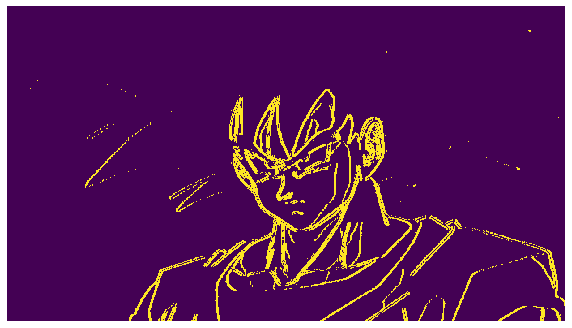

In [128]:
# get edges
abs_sobel = gradient_abs_sobel2(smoothed_image)
edges = mask(scale(abs_sobel), 8, 130)

In [94]:
dog=DifferenceOfGaussian(smoothed_image, 3)

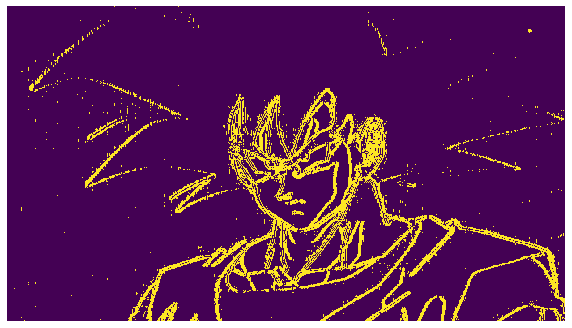

In [126]:
show_image(edges)

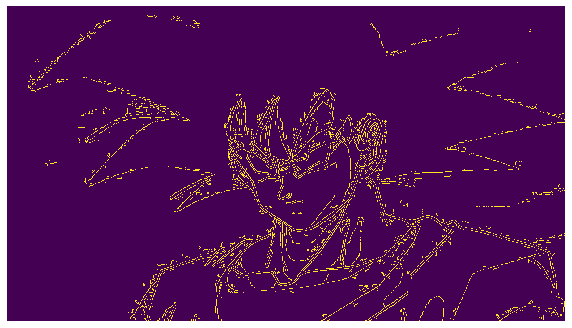

In [125]:
edges_2 = cv2.Canny(smoothed_image,10,40)
show_image(edges_2)

In [99]:
edges_3 = cv2.bitwise_or(edges_2, dog)

In [115]:
# get conneccted components
n, components = cv2.connectedComponents(edges_2, connectivity=8)

Applying a Gaussian blur to the
images before removing the screentones produced better results
to a certain extent. As seen in Fig. 5, Gaussian blur with a kernel
radius of 1 or 2 gave improved results, while at a kernel radius of 3
the outlines started disappearing, reducing the quality of the result.
We can see that there is an optimal value, and our experiments
show that it depends on the input image. We therefore make this
setting available for adjustment by the use

## Screentone Removal

First, we create
a screentone removal mask Mrm, which removes screentone
areas as much as possible, and a line preserving mask Ml p,
which retains as many lines as possible. Then, we combine
these masks, taking account of connected components



To select i, we
introduce two criteria, the Connected Component Criteria
(CCC) and the Stop Criteria (STC), which are defined as
follows

CCCi = 1−
NCC(MLoGi
)
NCC(MLoGi−2
)
, (3)
STCi =
NCC(MLoGi
)
NCC(MLoG1
)
×|(NCC(MLoGi−2
)−NCC(MLoGi
))|

where NCC(M) is the number of connected components of
black pixels in a mask M. CCCi
is a ratio showing the decrease in the number of connected components when i is incremented. If CCCi has its highest value at i
∗
, it means the
most screentones are removed at i
∗
. We empirically found
that i values a little larger than i
∗
are best for our purpose.
If we increment i much more, the lines become too blurred

In [12]:
# original_image = cv2.imread("gintoki_4.jpg")

# h, w, _ = original_image.shape

# generated_image = cv2.imread("generated_img/gen_image_3.png")
# generated_image = cv2.resize(generated_image, (w, h))

# bw_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# show_image(original_image)
# show_image(generated_image)


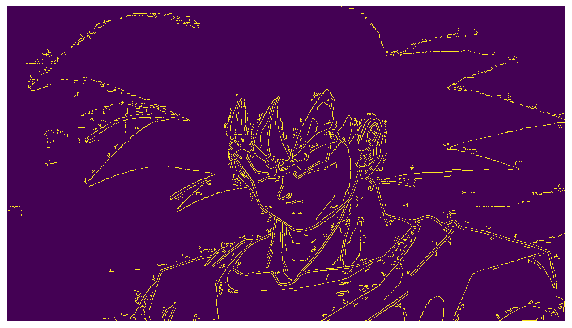

In [117]:
L = np.zeros(smoothed_image.shape,  np.uint8)
mask_ = np.array(components, dtype=np.uint8)#  
for label in range(1, n):
    
    if len(mask_[components == label]) > 20:
        mask_[components == label] = 255
        mask_[mask_ < 255] = 0
        L = cv2.bitwise_or(L, mask_)

show_image(L)



trapped-ball 15
trapped-ball 10
trapped-ball 9
trapped-ball 8
trapped-ball 7
trapped-ball 6
trapped-ball 5
trapped-ball 4
floodfill


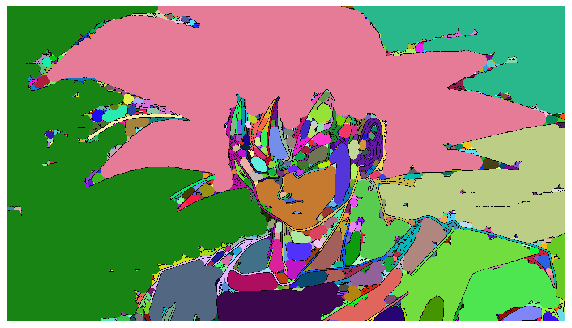

In [121]:
result = cv2.bitwise_not(L)

fills = []

fill = trapped_ball_fill_multi(result, 15, method="max")
fills += fill
result = mark_fill(result, fill)

for i in range(10,3, -1):
    fill = trapped_ball_fill_multi(result, i, method="mean")
    fills += fill
    result = mark_fill(result, fill)

fill = flood_fill_multi(result)
fills += fill

fillmap = build_fill_map(result, fills)

show_image(np.array(show_fill_map(fillmap), dtype=np.uint8))

merge 1
merge 2
merge 3
merge 4


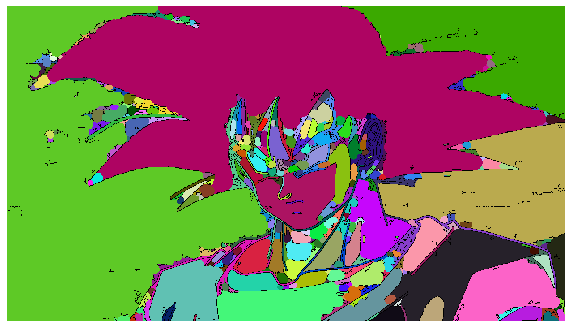

In [122]:
final=merge_fill(fillmap, max_iter=50)
show_image(np.array(show_fill_map(final), dtype=np.uint8))

In [129]:
h, w, d = orig_image.shape

In [130]:
generated_image = cv2.resize(generated_image, (w,h))

C:\Users\ryan_\.conda\envs\azure_grabchallenge\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ryan_\.conda\envs\azure_grabchallenge\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


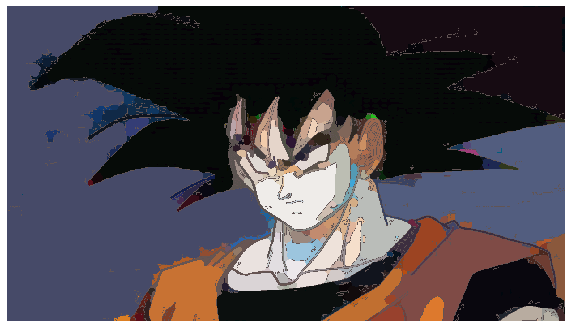

In [131]:
r,g,b = cv2.split(generated_image)

b_empty = np.zeros((h, w))
g_empty = np.zeros((h, w))
r_empty = np.zeros((h, w))

for i in range(np.max(final)):
    
    #blue
    blue_filter = (b * (final == i)).astype('int')
    blue_filter[blue_filter!=0] = np.mean(blue_filter[blue_filter != 0]).astype("int")
    b_empty += blue_filter
    
    #green
    green_filter = (g * (final == i)).astype('int')
    green_filter[green_filter != 0] = np.mean(green_filter[green_filter != 0]).astype("int")
    g_empty += green_filter
    
    #red
    red_filter = (r * (final == i)).astype('int')
    red_filter[red_filter != 0] = np.mean(red_filter[red_filter != 0]).astype("int")
    r_empty += red_filter
    
rgb = np.dstack((r_empty,g_empty,b_empty))
rgb=cv2.cvtColor(rgb.astype(np.uint8), cv2.COLOR_BGR2RGB)

show_image(rgb.astype(np.uint8))


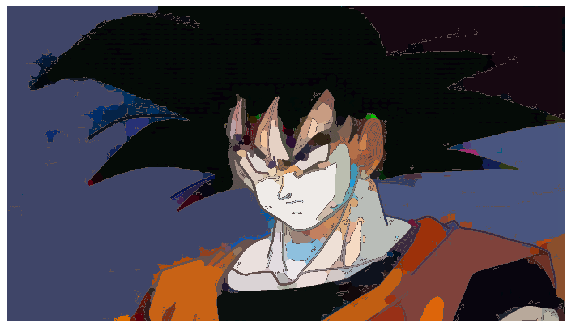

In [132]:
rgb_sat = increase_saturation(rgb.astype(np.uint8), inc=1.2)
show_image(rgb_sat)

In [133]:
import numpy as np

from sklearn import cluster

def quantize(raster, n_colors):
    width, height, depth = raster.shape
    reshaped_raster = np.reshape(raster, (width * height, depth))

    model = cluster.KMeans(n_clusters=n_colors)
    labels = model.fit_predict(reshaped_raster)
    palette = model.cluster_centers_

    quantized_raster = np.reshape(palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

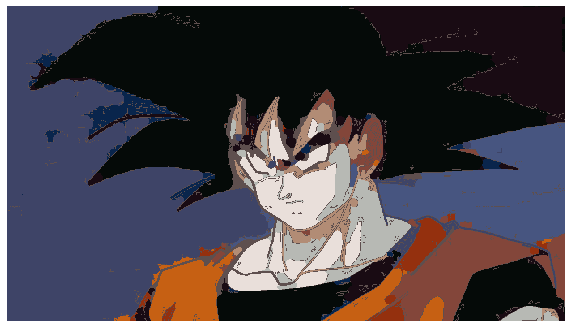

In [137]:
outs=quantize(rgb_sat, 12)
show_image(outs.astype(np.uint8))

In [ ]:
cvt.conv

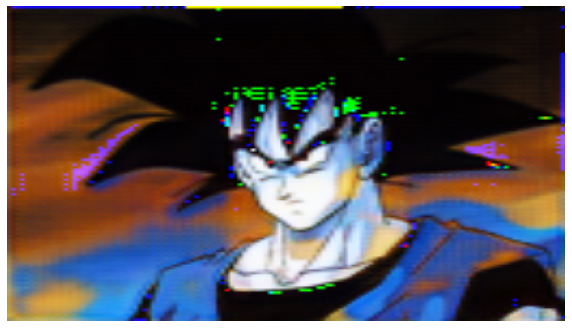

In [138]:
show_image(generated_image)

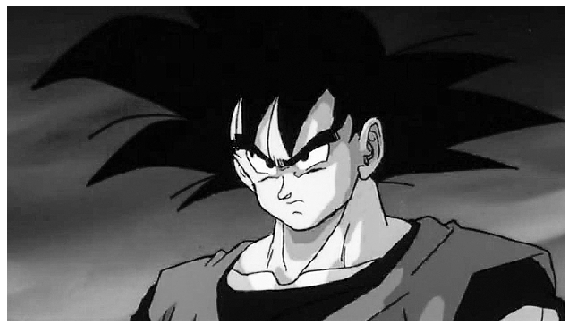

In [36]:
show_image(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

In [ ]:
show_image(generated_image)

In [ ]:
b, g, r = cv2.split(generated_image)

b_empty = np.zeros((481, 905))
g_empty = np.zeros((481, 905))
r_empty = np.zeros((481, 905))

image = sample_temp.copy()
for i in range(np.max(fillmap)):
    
    #blue
    blue_filter = (b * (fillmap == i)).astype('int')
    mode_value = stats.mode(blue_filter[blue_filter != 0])[0]
    blue_filter[blue_filter != 0] = mode_value
    b_empty += blue_filter
    
    #green
    green_filter = (g * (fillmap == i)).astype('int')
    mode_value = stats.mode(green_filter[green_filter != 0])[0]
    green_filter[green_filter != 0] = mode_value
    g_empty += green_filter
    
    #red
    red_filter = (r * (fillmap == i)).astype('int')
    mode_value = stats.mode(red_filter[red_filter != 0])[0]
    red_filter[red_filter != 0] = mode_value
    r_empty += red_filter
    
    rgb = np.dstack((r_empty,g_empty,b_empty))
#     print(rgb.shape)
#     plt.imshow(rgb.astype(np.uint8))
#     plt.show()

In [ ]:
def show_fill_map(fillmap):
    """Mark filled areas with colors. It is useful for visualization.
    # Arguments
        image: an image.
        fills: an array of fills' points.
    # Returns
        an image.
    """
    # Generate color for each fill randomly.
    colors = np.random.randint(0, 255, (np.max(fillmap) + 1, 3))
    # Id of line is 0, and its color is black.
    colors[0] = [0, 0, 0]

    return colors[fillmap]


In [ ]:
plt.imshow(img)

In [ ]:
color=np.random.randint(0, 255, (np.max(fillmap) + 1, 3))

In [ ]:
color.shape

In [34]:
cartoon_image = cv2.edgePreservingFilter(gray_image, flags=1, sigma_s=60, sigma_r=0.4)
show_image(cartoon_image)

TypeError: Expected cv::UMat for argument 'src'

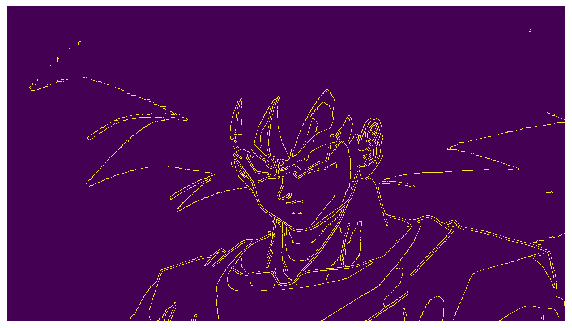

In [ ]:
# # remove noise
# img = cv2.GaussianBlur(gray,(3,3),0)

# # convolute with proper kernels
# laplacian = cv2.Laplacian(img,cv2.CV_64F)
# sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x

In [92]:
original_image=cv2.imread("dball/test_image_2.jpg")

In [139]:
bw_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
blur_image =  cv2.GaussianBlur(bw_image,(3,3),0)

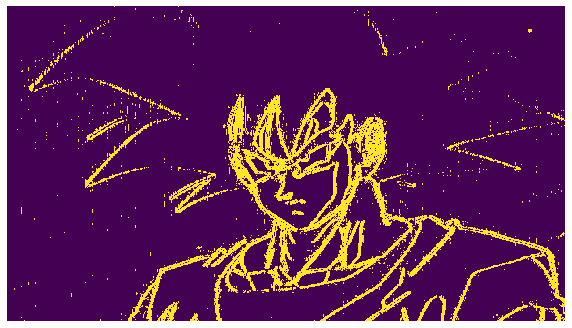

In [140]:
gray = grayscale(original_image)
abs_sobel = gradient_abs_sobel2(blur_image)
result = mask(scale(abs_sobel), 7, 200)
show_image(result)

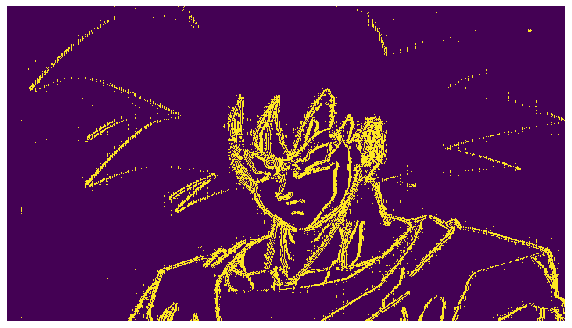

In [36]:
#Canny edge detection 

canny_edges = cv2.Canny(result, 10, 200)
show_image(canny_edges)


TypeError: Required argument 'threshold2' (pos 4) not found

In [109]:
laplacian = cv2.Laplacian(blur_image,cv2.CV_64F)
sobelx = cv2.Sobel(blur_image,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(blur_image,cv2.CV_64F,0,1,ksize=5)  # y

In [99]:
sobelx.shape

(703, 1247)

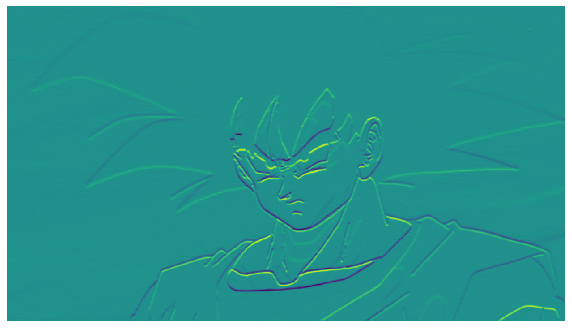

In [100]:
show_image(s)

In [ ]:
dball.shape

In [ ]:
show_image(cv2.Canny(cv2.GaussianBlur(dball,(1,1),0),586, 308))
show_image(cv2.Laplacian(dball, cv2.CV_64F))

In [ ]:
color[0]=[0,0,0]

In [ ]:
color.shape

In [ ]:
show_fill_map(fillmap)

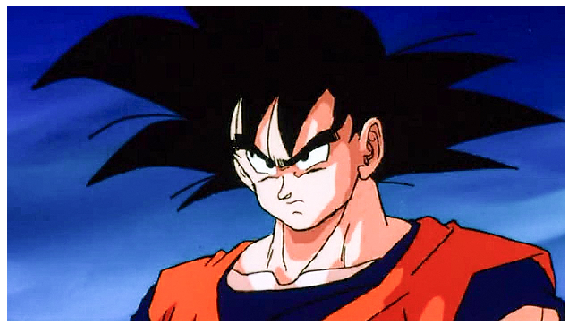

In [93]:
show_image(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

In [ ]:
# Screen Tone Removal
ilog, ibase, removalMask = ScreenToneRemoval()
# Line Preserving
linePreservingMask = DifferenceOfGaussian(sample_image, 5)
#
mask = cv2.bitwise_and(removalMask, removalMask, mask=linePreservingMask) #or
n, components = cv2.connectedComponents(mask)
R = removalMask
show_image(mask)

In [102]:
def auto_canny(image, sigma=0):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, 10, 200)
    
    return edged

edged=auto_canny(blur_image)
ret,th2 = cv2.threshold(edged,100,255,cv2.THRESH_BINARY)
show_image(th2)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\canny.cpp:949: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'
